# DATA UNDERSTANDING

### TABLE OF CONTENTS
1. [BACKGROUND](#background)
2. [ABOUT THE DATASET](#about_the_dataset)
3. [NUMERIC VARIABLES' ANALYSIS](#numeric_analysis)
4. [CATEGORICAL VARIABLES' ANALYSIS](#cat_analysis)
5. [CASE STUDY: WESTMINSTER](#westminster)
6. [CORRELATION ANALYSIS](#correlation_analysis)

### BACKGROUND <a name='background'></a>
A LSOA is a census area containing 1,000 to 3,000 people. SOAs were designed to improve the reporting of small area statistics and are built up from groups of output areas
(OA). Statistics for lower layer super output areas (LSOA) and middle layer super output areas (MSOA) were 
originally released in 2004 for England and Wales. Scotland also released statistics for data zones (DZ), that 
were equivalent to LSOAs, in 2004 and intermediate geographies (IG),  that were equivalent to MSOAs, in 2005. 
Northern Ireland introduced LSOAs in 2005 but do not have an MSOA geography.

### ABOUT THE DATASET <a name='about_the_dataset'></a>
This data, represented by the file `london_crime_by_lsoa.csv`, covers the number of criminal reports by month, 
LSOA borough, and major/minor category from Jan 2008-Dec 2016 in Greater London (central London and the 
surrounding metropolitan area) by providing 13,490,604 samples with 7 variables 
each.

The variables `lsoa_code`, `borough`, `major_category`, `minor_category`, `year` and `month` are **categorical** 
variables, while `value` is a **discrete numerical** variable. The variables' meanings are the followings:

* `lsoa_code`: code for Lower Super Output Area in Greater London;
* `borough`: common name for London borough;
* `major_category`: high level categorization of crime;
* `minor_category`: low level categorization of crime within major category;
* `year`: year of reported counts, 2008-2016;
* `month`: month of reported counts, 1-12;
* `value`: monthly reported count of categorical crime in given borough;

### LIBRARIES

In [1]:
import geopandas as gpd
import ipdb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from collections import defaultdict
from scipy import stats

%matplotlib inline

### LOADING THE DATASET

In [2]:
ds = pd.read_csv('../data/london_crime_by_lsoa.csv', dtype={'month': str,
                                                            'year': str})

### NUMERIC VARIABLES' ANALYSIS <a name='numeric_analysis'></a>

#### SUPERFICIAL ANALYSIS

`value` is the only numeric variables in the dataset, it represents the monthly reported count of categorical crime
in given borough and has 247 unique values. Its **minimum value** is 0 and its **maximum value** is 309, the 
**mode** is 0, which appears in the 74.56% of the dataset's samples.

In [3]:
num_summary = ds.describe(include=np.number)

In [4]:
print('MIN: {}, MAX: {}, UNIQUE VALUES: {}, MODE: {}'.
      format(int(num_summary['value']['min']),
             int(num_summary['value']['max']),
             ds['value'].unique().shape[0],
             stats.mode(ds['value'])[0][0]))

MIN: 0, MAX: 309, UNIQUE VALUES: 247, MODE: 0


#### SUMMARY

Since 10,071,505, that is, the 74.56% of the dataset's samples have the variable `value` eguals to 0, we can conclude 
that, on a superficial level, the window of time from 2008 to 2016 wasn't too dense of criminal activities.

#### CRIMES PER YEAR, CRIMES PER MONTH

In [5]:
crimes_per_year, crimes_per_month = {}, {}
months = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']


for year in np.sort(ds['year'].unique()):
    crimes_y = ds.loc[(ds['year'] == year)]
    crimes_per_year[year] = sum(crimes_y['value'])
    crimes_per_month[year] = []
    
    
    for month in months:
        crimes = crimes_y.loc[crimes_y['month'] == month]
        crimes_per_month[year].append(sum(crimes['value']))

sorted_vals = list(crimes_per_year.values())
sorted_vals.sort()

cpm_matrix = np.mean([crimes_per_month[key] for key in crimes_per_month.keys()],
                     axis=0)

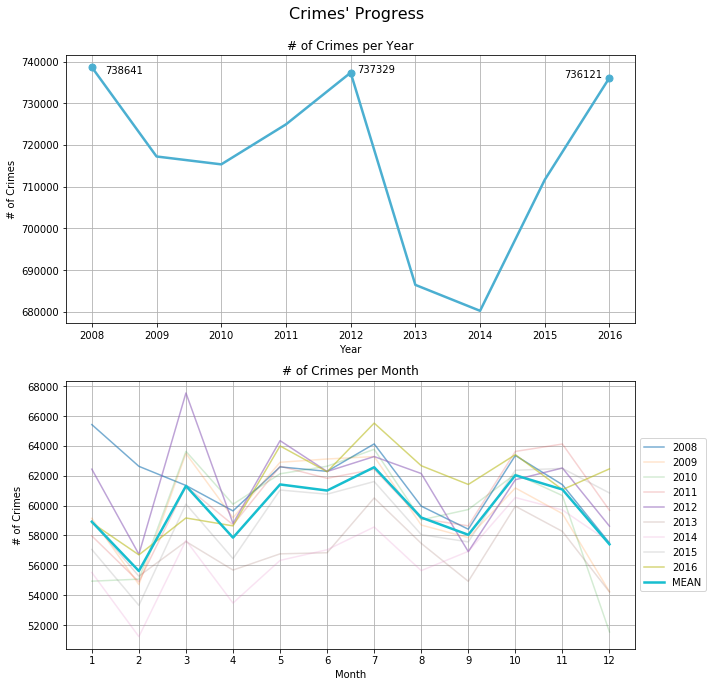

In [6]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
plt.plot(range(len(crimes_per_year.keys())), list(crimes_per_year.values()),
         linewidth=2.5, color='#4bafd1', marker='o', markersize=7.0,
         markevery=[0, 4, 8])
plt.annotate(sorted_vals[-1], (0.2, sorted_vals[-1] - 1500))
plt.annotate(sorted_vals[-2], (4.1, sorted_vals[-2]))
plt.annotate(sorted_vals[-3], (7.3, sorted_vals[-3]))
plt.xticks(range(len(crimes_per_year.keys())), crimes_per_year.keys())
plt.xlabel('Year')
plt.ylabel('# of Crimes')
plt.title('# of Crimes per Year')
plt.grid()

plt.subplot(2, 1, 2)
for year in crimes_per_month.keys():
    if int(year) in [2008, 2012, 2016]:
        plt.plot(range(len(crimes_per_month[year])), crimes_per_month[year], 
                 label=year, alpha=.6)
    else:
        plt.plot(range(len(crimes_per_month[year])), crimes_per_month[year], 
                 label=year, alpha=.2)
plt.plot(range(12), cpm_matrix, label='MEAN', linewidth=2.5)

plt.xticks(range(len(ds['month'].unique())), months)
plt.xlabel('Month')
plt.ylabel('# of Crimes')
plt.title('# of Crimes per Month')
plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


plt.suptitle("Crimes' Progress", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('../imgs/data_understanding/crimes_per_year_month.pdf', 
            bbox_inches='tight')

#### MOST DANGEROUS YEARS

In [7]:
crimes_per_year, crimes_per_month = {}, {}

for year in ['2008', '2012', '2016']:
    crimes_y = ds.loc[(ds['year'] == year)]
    crimes_per_month[year] = []
    
    for month in ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']:
        crimes = crimes_y.loc[crimes_y['month'] == month]
        crimes_per_month[year].append(sum(crimes['value']))

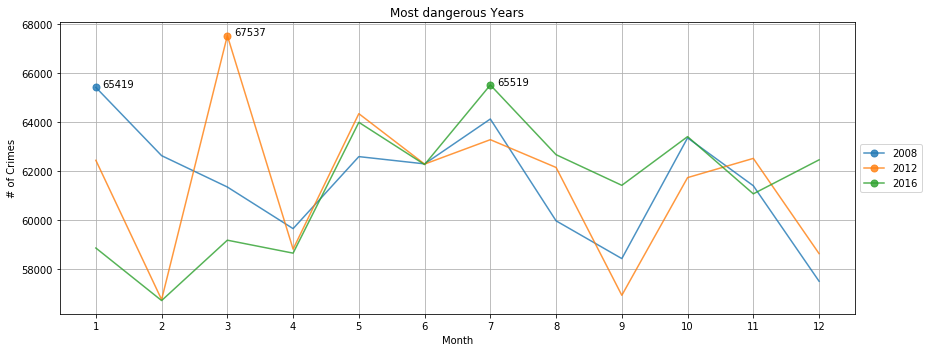

In [8]:
plt.figure(figsize=(13, 5))

xy = None

for year in crimes_per_month.keys():    
    if year == '2008':
        xy = (0.1, max(crimes_per_month[year]))
        markevery = [0]
    elif year == '2012':
        xy = (2.1, max(crimes_per_month[year]))
        markevery = [2]
    else:
        xy = (6.1, max(crimes_per_month[year]))
        markevery = [6]
        
    plt.plot(range(len(crimes_per_month[year])), crimes_per_month[year], 
             label=year, alpha=.8, marker='o', markersize=7.0,
             markevery=markevery)
    plt.annotate(max(crimes_per_month[year]), xy)

plt.xticks(range(len(ds['month'].unique())), 
           ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'])
plt.xlabel('Month')
plt.ylabel('# of Crimes')
plt.title('Most dangerous Years')
plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig('../imgs/data_understanding/most_dangerous_years.pdf', 
            bbox_inches='tight')

#### SUMMARY

The first figure represents the flow of criminal activities on a by-year basis. As we can see, the most criminally 
dense year were, respectively, 2008, 2012 and 2016. On the other side, the most peaceful were, respectively, 2014 and 2013. From the second figure we can zoom in and appreciate the flow of criminal activities on a by-month basis, 
observing a behavior that remains coherent with the first figure. The third figures shows the flow of criminal 
activities on a by-month basis for the most dense years. If we imagine the criminal activities represented in this
graphs like a flow, it is noteworthy that the amount of criminal reports have the tendency to increase once every
four years.

### CATEGORICAL VARIABLES' ANALYSIS <a name='cat_analysis'></a>

For the categorical variables' superficial analysis I have decided to omit the records with a 0 value in the 
`value` variable, since it means that in that particular borough, month and year it hasn't been registered any
criminal activity, that is, the overall categorical variables' statistics would be distorted by the presence of this
records.

#### SUPERFICIAL ANALYSIS

* `lsoa_code` has 4835 unique values, of which `E01004734` is the most frequent, appearing in the 0.070% of the 
  cropped dataset's records;
* `borough` has 33 unique values, of which `Lambeth` is the most frequent, appearing in the 4.47% of the cropped
  dataset's records;
* `major_category` has 9 unique values, of which `Theft and Handling` is the most frequent, appearing in the 33.25%
  of the cropped dataset's records;
* `minor_category` has 32 unique values, of which `Other Theft` is the most frequent, appearing in the 8.70% of the
  cropped dataset's records;
* `year` has 9 unique values, of which `2016` is the most frequent, appearing in the 11.45% of the cropped 
  dataset's records;
* `month` has 12 unique values, of which `7` is the most frequent, appearing in the 8.66% of the cropped dataset's
  records;

In [9]:
cropped_ds = ds.loc[ds['value'] != 0]
cropped_ds.describe(include=np.object)

,lsoa_code,borough,major_category,minor_category,year,month
count,3419099,3419099,3419099,3419099,3419099,3419099
unique,4835,33,9,32,9,12
top,E01004734,Lambeth,Theft and Handling,Other Theft,2016,7
freq,2387,152784,1136994,297281,392042,296151


#### SUMMARY

Apart from what has been said in the superficial analysis, it emerges that the year `2016`, despite being the least
dense of criminal activities in the top three represented by the years, in descending order, `2008`, `2012` and 
`2016`, is the one that owns the majority of the records in the cropped dataset. It means that, remaining coherent
with what emerges in the numeric variable's analysis, it has the lower crime per month ratio among the three.

#### MINOR CATEGORIES PER MAJOR CATEGORY

In [10]:
for major_category in cropped_ds['major_category'].unique():
    minor_categories = \
        list(cropped_ds.loc[cropped_ds['major_category'] == major_category] \
        ['minor_category'].unique())
    print('\n{}: {}'.format(major_category, '\n\t'.join(minor_categories)))


Theft and Handling: Theft/Taking of Pedal Cycle
	Other Theft Person
	Other Theft
	Theft/Taking Of Motor Vehicle
	Theft From Shops
	Motor Vehicle Interference & Tampering
	Theft From Motor Vehicle
	Handling Stolen Goods

Violence Against the Person: Harassment
	Wounding/GBH
	Assault with Injury
	Common Assault
	Offensive Weapon
	Other violence
	Murder

Criminal Damage: Criminal Damage To Motor Vehicle
	Criminal Damage To Dwelling
	Criminal Damage To Other Building
	Other Criminal Damage

Robbery: Personal Property
	Business Property

Burglary: Burglary in a Dwelling
	Burglary in Other Buildings

Other Notifiable Offences: Going Equipped
	Other Notifiable

Drugs: Possession Of Drugs
	Drug Trafficking
	Other Drugs

Sexual Offences: Other Sexual
	Rape

Fraud or Forgery: Counted per Victim
	Other Fraud & Forgery


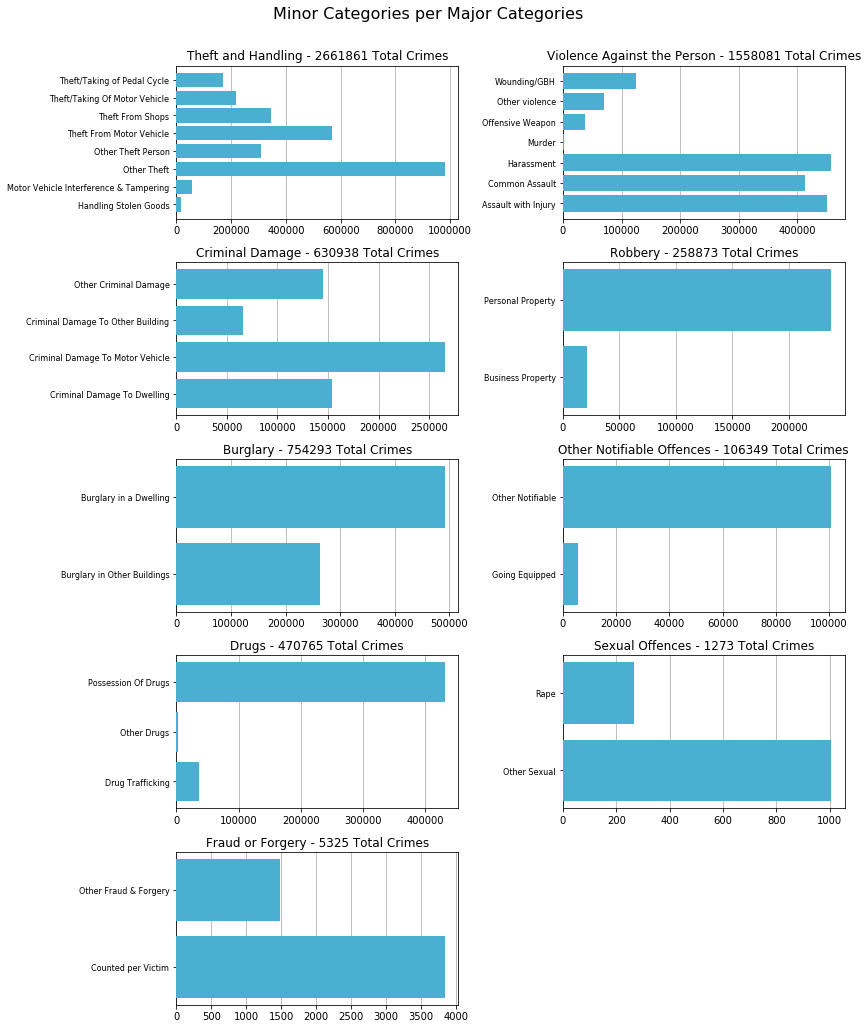

In [11]:
plt.figure(figsize=(12, 15))

for i, major_category in enumerate(cropped_ds['major_category'].unique()):
    min_cat = cropped_ds.loc[cropped_ds['major_category'] == major_category]. \
        groupby('minor_category').sum().to_dict()['value']
    
    plt.subplot(5, 2, i + 1)
    
    plt.barh(range(len(list(min_cat.keys()))), list(min_cat.values()), 
             color='#4bafd1', align='center', zorder=3)
    plt.yticks(range(len(list(min_cat.keys()))), list(min_cat.keys()), 
               fontsize=8)
    plt.title('{} - {} Total Crimes'.format(major_category, sum(list(min_cat.values()))), 
              fontsize=12)
    plt.grid(zorder=0, axis='x')

plt.suptitle('Minor Categories per Major Categories', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('../imgs/data_understanding/minor_categories_per_major_categories.pdf', 
            bbox_inches='tight')

#### SUMMARY

As we can see, the minor category crimes' nomenclature is very rich, with `Theft and Handling` being the most 
diversified with eight minor categories. In the graph, we can see the subdivision of the total number of criminal 
activities for each major category crime among its minor categories. By observing the graphs it is possible to
extract the most frequent minor category for each major category, obtaining:
* `Theft and Handling` -> `Other Theft`
* `Violence Against the Person` -> `Harrasment`
* `Criminal Damage` -> `Criminal Damage To Motor Vehicle`
* `Robbery` -> `Personal Robbery`
* `Burglary` -> `Burglary in a Dwelling`
* `Other Notifiable Offences` -> `Other Notifiable`
* `Drugs` -> `Possession Of Drugs`
* `Sexual Offences` -> `Other Sexual`
* `Fraud or Forgery` -> `Counted per Victim`

<a name='generic_visuals'></a>
#### # OF CRIMES PER BOROUGH, MAJOR CATEGORY CRIMES AND MINOR CATEGORY CRIMES 


Here a some overall visualizations for the three categorical variables `borough`, `major_category` and 
`minor_category`. As we can see, both `borough` and `minor_category` presents a quite variagate distribution, 
probably due to the big number of unique values the two variables have. In this context the word *distribution* 
is used not with its
statistical meaning, but just for addressing the number of samples per subcategory.

In [12]:
def plot_ordered_horizontal_barplot(dataset, column, title, x_label, y_label, 
                                    save=False):
    unique_values = dataset[column].unique()
    values_dict = defaultdict(list)
    
    for val in unique_values:
        values_dict[sum(dataset.loc[dataset[column] == val]['value'])]. \
            append(val)
    
    ys = range(sum([len(l) for l in values_dict.values()]))
    widths = []
    
    for key in values_dict:
        for value in values_dict[key]:
            widths.append(key)
    
    widths = np.sort(widths)
    
    ordered_keys = []
    
    for width in np.sort(list(values_dict.keys())):
        for value in values_dict[width]:
            ordered_keys.append(value)
    
    plt.grid(axis='x', zorder=0)
    plt.barh(y=ys, width=widths, color='#4bafd1', align='center', zorder=3)
    plt.yticks(ys, ordered_keys)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
    if save:
        plt.savefig(fname='../imgs/data_understanding/{}.pdf'.format(column), 
                    bbox_inches='tight')

In [13]:
map_df = gpd.read_file('../data/map/London_Borough_Excluding_MHW.shp')
crimes_per_borough = cropped_ds.groupby('borough')['value'].sum()
merged = map_df.set_index('NAME').join(crimes_per_borough)

merged['coords'] = merged['geometry'].\
    apply(lambda x: x.representative_point().coords[:])
merged['coords'] = [coords[0] for coords in merged['coords']]

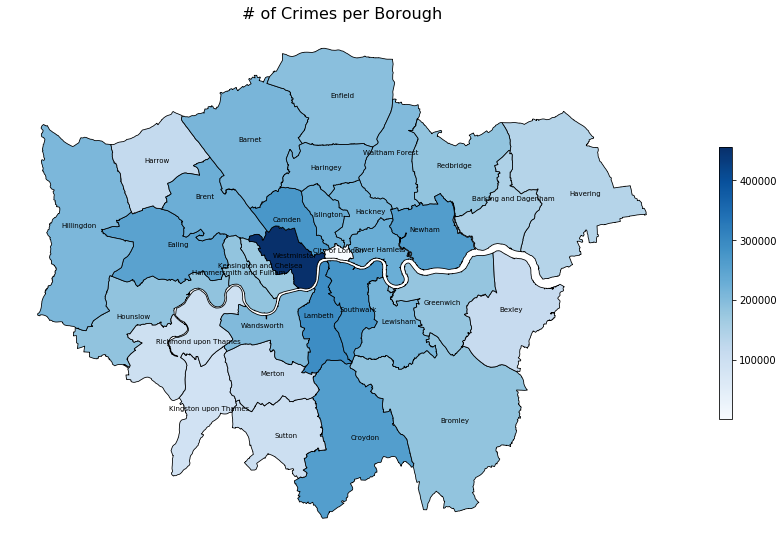

In [14]:
merged.plot(column='value', cmap='Blues', linewidth=0.8, edgecolor='black', 
            figsize=(15, 10))
plt.axis('off')
plt.title('# of Crimes per Borough', fontsize=16)
sm = plt.cm.ScalarMappable(cmap='Blues', 
                           norm=plt.Normalize(vmin=min(merged['value']), 
                                              vmax=max(merged['value'])))
sm._A = []
cbar = plt.colorbar(sm, shrink=0.5)
for idx, row in merged.iterrows():
    plt.annotate(s=idx, xy=row['coords'],
                 horizontalalignment='center', fontsize=7)
plt.savefig(fname='../imgs/data_understanding/crimes_by_borough.pdf', 
            bbox_inches='tight')

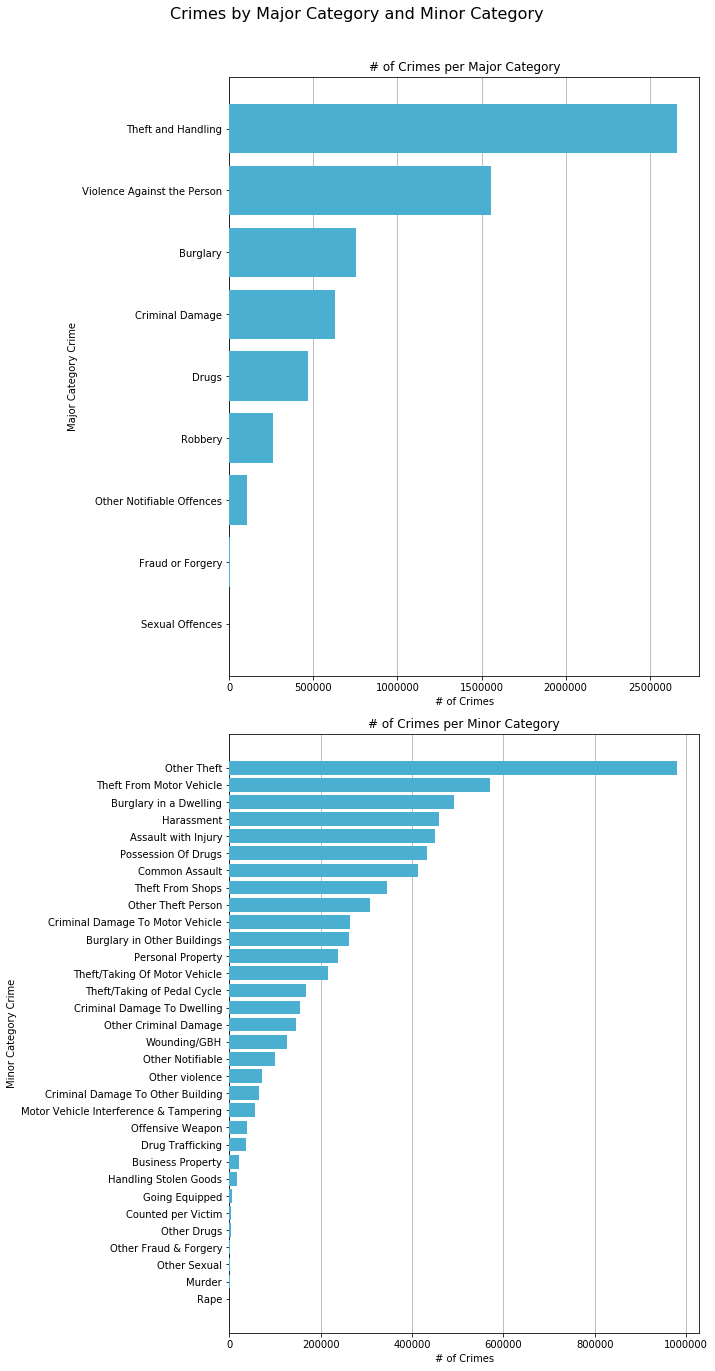

In [15]:
plt.figure(figsize=(10, 20))

plt.subplot(2, 1, 1)
plot_ordered_horizontal_barplot(cropped_ds, 'major_category', 
                                '# of Crimes per Major Category',
                                '# of Crimes', 'Major Category Crime')
plt.subplot(2, 1, 2)
plot_ordered_horizontal_barplot(cropped_ds, 'minor_category', 
                                '# of Crimes per Minor Category', '# of Crimes', 
                                'Minor Category Crime')
plt.suptitle('Crimes by Major Category and Minor Category', 
             fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig(fname='../imgs/data_understanding/crimes_by_borough_major_minor.pdf', 
            bbox_inches='tight')

#### SUMMARY

Despite being `Lambeth` the most popular borough among the cropped dataset's records, the most dangerous is actually
`Westminster`, as depicted in the first visualization. The second and third ones presents a scenario that is coherent
with what has been discovered during the superficial analysis, returning `Theft and Handling` as most frequent 
major category crime and `Other Theft` as most frequent minor category crime.

#### MAJOR CATEGORY CRIMES PER YEAR

Since the unique values for the `Major Category` variable are only nine, here I provide a different look at the 
variable by scaling the number of crimes per major category on a per-year base.

In [16]:
m_cat_per_year = defaultdict(list)

for category in cropped_ds['major_category'].unique():
    for year in np.sort(cropped_ds['year'].unique()):
        c_year = cropped_ds.loc[(cropped_ds['year'] == year)]
        crimes = sum(c_year.loc[(c_year['major_category'] == category)]['value'])
        m_cat_per_year[category].append(crimes)

mcpy_mean = np.mean([m_cat_per_year[key] for key in m_cat_per_year.keys()], 
                    axis=0)

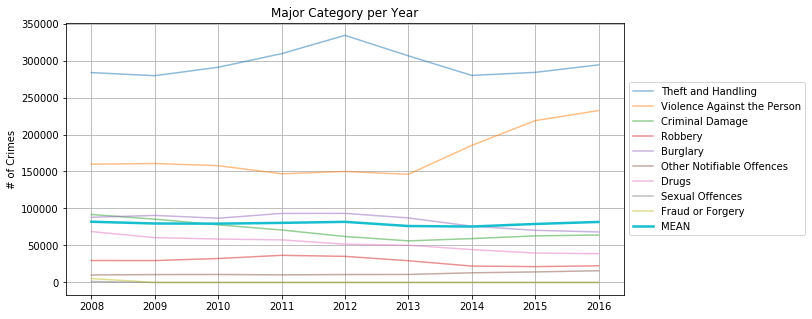

In [17]:
plt.figure(figsize=(10, 5))

for category in m_cat_per_year.keys():
    plt.plot(range(len(m_cat_per_year[category])), m_cat_per_year[category],
             label=category, alpha=.5)

plt.plot(range(9), mcpy_mean, linewidth=2.5, label='MEAN')

plt.xticks(range(len(cropped_ds['year'].unique())), 
           np.sort(cropped_ds['year'].unique()))
plt.ylabel('# of Crimes')
plt.title('Major Category per Year')
plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('../imgs/data_understanding/major_category_per_year.pdf', 
            bbox_inches='tight')

#### SUMMARY

As we can see, again, the most frequent major category crime is `Theft and Handling`, which mantains a pretty high
ratio over the years. At second place as major category crime there is `Violence Against the Person`, which 
exhibits an interesting behavior, that is, by consistently growing from 2013 to 2016. The other major category crimes
floats between 50000 and 100000 crimes per year. Both `Sexual Offences` and `Fraud or Forgery` barely show up on the
graph, since their crime per year ratio, compared with the other major category crimes, is very low.

### CASE STUDY: WESTMINSTER <a name='westminster'></a>

Here I present some visualizations for the most dangerous borough in the dataset, that is, Westminster.

In [18]:
westminster = cropped_ds.loc[ds['borough'] == 'Westminster']

print('RECORDS: {}'.format(westminster.shape[0]))

RECORDS: 110070


In [19]:
crimes_per_year, crimes_per_month = {}, {}


for year in np.sort(westminster['year'].unique()):
    crimes_y = westminster.loc[ds['year'] == year]
    crimes_per_year[year] = sum(crimes_y['value'])
    crimes_per_month[year] = []
    
    
    for month in ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']:
        crimes = crimes_y.loc[crimes_y['month'] == month]
        crimes_per_month[year].append(sum(crimes['value']))

cpm_mean = np.mean([crimes_per_month[key] for key in crimes_per_month.keys()],
                   axis=0) 

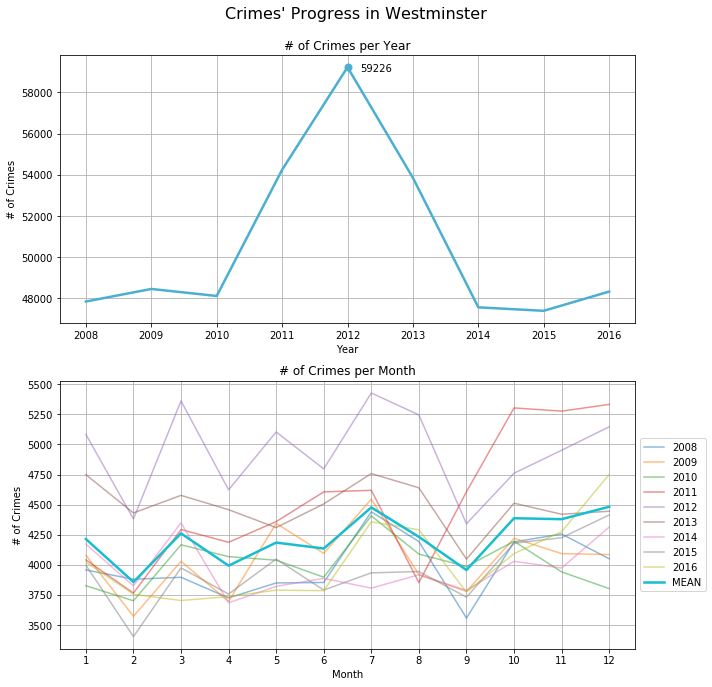

In [20]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
plt.plot(range(len(crimes_per_year.keys())), list(crimes_per_year.values()),
         color='#4bafd1', linewidth=2.5, marker='o', markersize=7.0,
         markevery=[4])
plt.annotate(max(list(crimes_per_year.values())), 
             xy=(4.2, max(list(crimes_per_year.values())) - 200))
plt.xticks(range(len(crimes_per_year.keys())), crimes_per_year.keys())
plt.xlabel('Year')
plt.ylabel('# of Crimes')
plt.title('# of Crimes per Year')
plt.grid()

plt.subplot(2, 1, 2)
for year in crimes_per_month.keys():
    plt.plot(range(len(crimes_per_month[year])), crimes_per_month[year], 
             label=year, alpha=.5)
plt.plot(range(12), cpm_mean, label='MEAN', linewidth=2.5)

plt.xticks(range(len(ds['month'].unique())), 
           ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'])
plt.xlabel('Month')
plt.ylabel('# of Crimes')
plt.title('# of Crimes per Month')
plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.suptitle("Crimes' Progress in Westminster", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('../imgs/data_understanding/westminster.pdf', bbox_inches='tight')

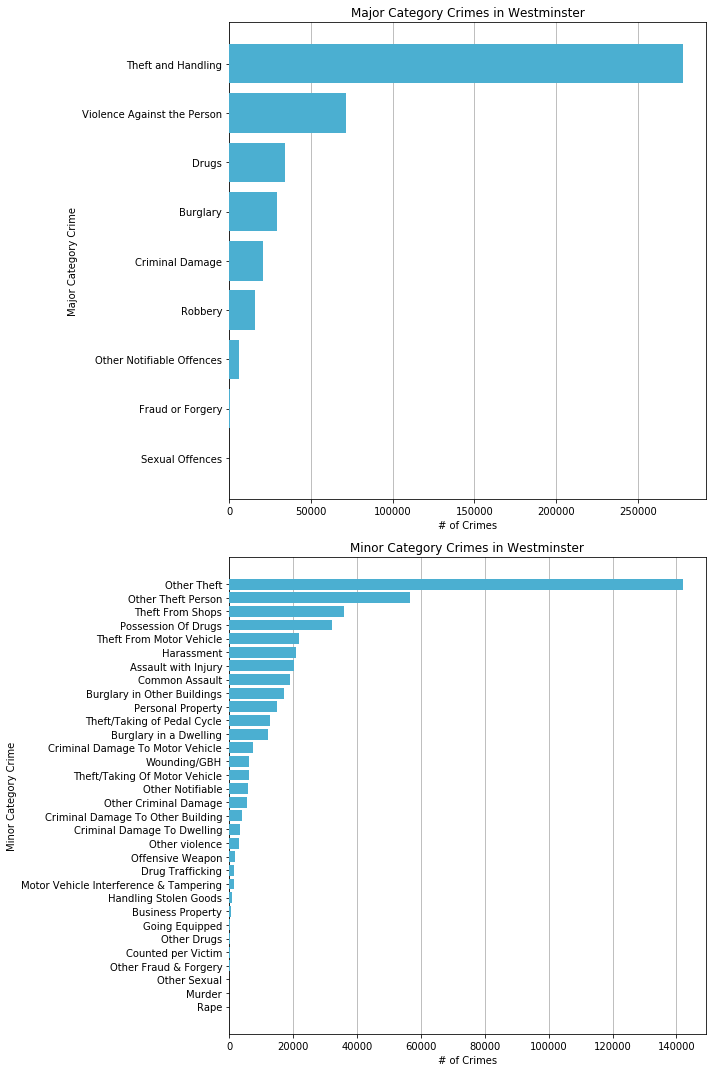

In [21]:
plt.figure(figsize=(10, 15))
plt.subplot(2, 1, 1)
plot_ordered_horizontal_barplot(westminster, 'major_category', 
                                'Major Category Crimes in Westminster',
                                '# of Crimes', 'Major Category Crime')
plt.subplot(2, 1, 2)
plot_ordered_horizontal_barplot(westminster, 'minor_category', 
                                'Minor Category Crimes in Westminster',
                                '# of Crimes', 'Minor Category Crime')
plt.tight_layout()

### CORRELATION ANALYSIS<a name='correlation_analysis'></a>

In order to enrich the informations gathered so far, the next step is to perform the well known Correlation Analysis. 
Since the majority of the dataset's variables are categorical variables, the **Pearson's chi-squared test** has to be
used.

In [22]:
def test_dependence(col_1, col_2, prob=0.95):
    contingency_table = pd.crosstab(cropped_ds[col_1], 
                                    cropped_ds[col_2]).fillna(0)
    stat, p, dof, expected = stats.chi2_contingency(contingency_table.values)
    critical = stats.chi2.ppf(prob, dof)
    
    if abs(stat) >= critical:
        return 'D'
    else:
        return 'I'

In [23]:
correlation_data = np.empty((len(cropped_ds.columns), len(cropped_ds.columns)), 
                            np.object)
columns = cropped_ds.columns.tolist()

for index, col_1 in enumerate(columns):
    c = index
    
    for col_2 in columns[index:]:
        result = test_dependence(col_1, col_2)
        correlation_data[index][c], correlation_data[c][index] = result, result
        c += 1

In [24]:
correlation_dataframe = pd.DataFrame(data=correlation_data, index=columns,
                                     columns=columns, dtype=np.object)
correlation_dataframe

,lsoa_code,borough,major_category,minor_category,value,year,month
lsoa_code,D,D,D,D,D,D,I
borough,D,D,D,D,D,D,D
major_category,D,D,D,D,D,D,D
minor_category,D,D,D,D,D,D,D
value,D,D,D,D,D,D,D
year,D,D,D,D,D,D,D
month,I,D,D,D,D,D,D


#### SUMMARY

The results returned by the correlation analysis are not surprising. Essentially, the dataset is composed by a set
of variables that are all depending on each other. In the table above we can see that the majority of variables have
a relation with the other variables that can be classified as *dependent*, that is, using the capital letter D in the 
table, while the variables `lsoa_code` and `month` are classified as *independent*, that is, using the capital letter
I in the table.